<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/test_anna02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import os

print("Current Working Directory:", os.getcwd())
print("\nFiles in the Current Directory:")
print(os.listdir('.'))

Current Working Directory: /content

Files in the Current Directory:
['.config', 'sample_data']


In [37]:
from content import ConvexHull2D
import numpy as np
model = ConvexHull2D()

ModuleNotFoundError: No module named 'content'

In [17]:
def divide_area(start, end, points):
    if points is None or len(points) < 1:  # Modified to use len(points) for numpy array
        return None, None
    S1, S2 = [], []
    for _, point in enumerate(points):
        dis = compute_distance(start, end, point)
        if dis > 0:
            S1.append(point)
        else:
            S2.append(point)
    S1 = np.vstack(S1) if len(S1) else None
    S2 = np.vstack(S2) if len(S2) else None
    return S1, S2

In [22]:
def triangle_partition(points, P, C, Q):
    if points is None:
        return None, None
    S1, S2 = [], []
    for _, point in enumerate(points):
        disPC = compute_distance(P, C, point)  # Use cross product to determine which side the point is on
        disCQ = compute_distance(C, Q, point)
        # Adjusting the conditions based on how compute_distance interprets the sides
        if disPC > 0 and disCQ > 0:  # Assuming positive distance means 'right side' for both segments
            S1.append(point)
        elif disPC < 0 and disCQ < 0:  # Assuming negative distance means 'left side' for both segments
            S2.append(point)
    S1 = np.vstack(S1) if len(S1) else None
    S2 = np.vstack(S2) if len(S2) else None
    return S1, S2

In [41]:
def compute_distance(start, end, point, eps=1e-8):
    '''
    Return the cross product from point to segment defined by (start, end)
    '''
    return np.cross(end-start,point-start)/(np.linalg.norm(end-start)+eps) #prevent from dividing by 0

def clock_sort(x):
    '''
    Return sorted vertices in the clockwise using the angle
    between the x-axis and vector pointing from the center to the point
    '''
    x0, y0 = x[:,0].mean(), x[:,1].mean()
    theta = np.arctan2(x[:,1] - y0, x[:,0] - x0)
    index = np.argsort(theta)
    x = x[index]

    return x

class ConvexHull2D:


    def __init__(self):
        self.points = None
        self.convext_hull = []

    def __call__(self, point_set):
        return self.forward(point_set)

    def reset(self):
        self.points = None
        self.convext_hull = []

    def forward(self, point_set):
        if point_set is None or len(point_set) < 3:
            print("No valid convex hull is found! Please provide more than 3 unique points")
            return None
        self.reset()
        self.points = np.unique(point_set, axis=0) #get rid of duplicate elements
        return self._quickhull()

    def isInside(self, points):
        if len(self.convext_hull) == 0:
            print("Please build a convex hull first.")
            return None
        result = []
        for point in points:
            result.append(self._isInside(point))
        return np.asarray(result)

    def _quickhull(self):
        self.points = self.points[np.lexsort(np.transpose(self.points)[::-1])]  # sort the data by x-axis, then by y-axis
        left_most, right_most = self.points[0], self.points[-1]     #find the left-most point and right-most point
        self.points = self.points[1:-1]     #Get the rest points
        self.convext_hull.append(left_most)     #add the left-most point into the output
        self.convext_hull.append(right_most)    #add the right-most point into the output

        self.right_points, self.left_points = divide_area(start=left_most,
                                                          end=right_most,
                                                          points=self.points)

        self._findhull(self.right_points, left_most, right_most)
        self._findhull(self.left_points, right_most, left_most)

        self.convext_hull = np.stack(self.convext_hull)
        self.convext_hull = clock_sort(self.convext_hull)
        if self.convext_hull.shape[0] < 3:
            try:
                raise Exception("Not enough points are found for convex hull. Please check your input and other information")
            except Exception as inst:
                print(type(inst))
                print(inst.args)
        else:
            return self.convext_hull

    def _findhull(self, points, P, Q):
        if points is None:
            return None
        distance = 0.0
        C, index = None, None
        for i, point in enumerate(points):
            current_dis = abs(compute_distance(P, Q, point))
            if current_dis > distance: # find a point whose distance from PQ is the maximum among all the points
                C = point
                index = i
                distance = current_dis
        if C is not None:
            self.convext_hull.append(C)
            points = np.delete(points, index, axis=0) #delete C from original points
        else:
            try:
                raise Exception("The input points are located on the same line. No convex hull is found!")
            except Exception as inst:
                print(type(inst))
                print(inst.args)
                return


        S1, S2 = triangle_partition(points, P, C, Q) #interate this process for S1 and S2
        self._findhull(S1, P, C)
        self._findhull(S2, C, Q)

    def _isInside(self, point):
        for i in range(self.convext_hull.shape[0]-1):
            start, end = self.convext_hull[i], self.convext_hull[i+1]
            if compute_distance(start, end, point) < 0:
                return False
        return True




In [42]:
points = None
model(points)

NameError: name 'model' is not defined

In [43]:
points = np.array([[0,0], [1,2], [-4.9, 0.73]])
model(points)

NameError: name 'model' is not defined

NameError: name 'model' is not defined

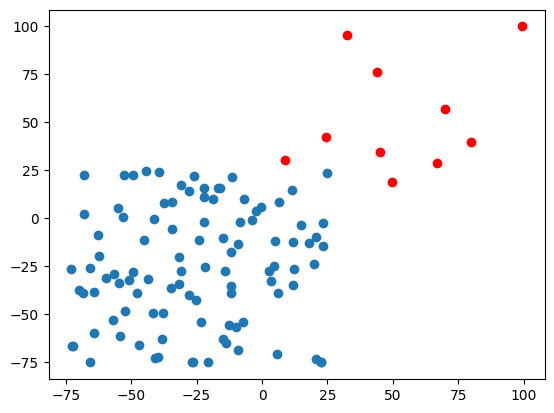

In [44]:
import matplotlib.pyplot as plt

points = np.random.random((100,2)) * 100 #draw from normal distribution and scale it
points -= np.random.random() * 100 # test points with positive and negative coordinates
test_points = np.random.random((10,2)) * 100

plt.plot(points[:,0], points[:,1], 'o')
plt.plot(test_points[:,0], test_points[:,1], 'ro')
convex_hull = model(points)
print ("The vertices of convex hull are\n")
print (convex_hull)

#Close the hull during plot by making the head and tail as the same point
convex_hull = np.vstack([convex_hull, convex_hull[0]])
plt.plot(convex_hull[:,0], convex_hull[:,1])

isInside = model.isInside(test_points)
print ("\n")
print ("Testing the model with random test set")
for point, status in zip(test_points, isInside):
    print("point: ", point, " status: ", status )

plt.show()